#**Daily Average Electricity Prices Prediction**

This notebook is part of the deliverables for the SustAInify'24: Problem Statement solution. It contains the methodology followed to predict the daily average electricity prices at the Power Exchange in the year 2018 from the provided Power Exchange Data for the year 2010 to 2017 using ML.


##Exploratory Data Analysis

Let's start with retrieving the data from the excel files provided and storing them in pandas DataFrame.

In [1]:
#Importing necessary libraries for analysis and visualisation of the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Hourly data is used to capture the variations in detail. There are some irragularities in the sheet and column names among different files, so, data was retreieved from each file individually.

In [2]:
#Retrieving from excel file
df10= pd.read_excel('Power Exchange Data_ 2010.xlsx', sheet_name= 'Hourly Prices & Volumes')

#Storing in a DF by making the dates as index and renaming the columns uniformly
df10= pd.DataFrame(data=df10[['Hours\n','Prices (EUR/MWh)']].values,index= pd.to_datetime(df10.Date), columns=['Hours','Prices'])

df11= pd.read_excel('Power Exchange Data_ 2011.xlsx', sheet_name= 'Hourly Prices & Volumes')
df11= pd.DataFrame(data=df11[['Hours','Prices (EUR/MWh)']].values,index= pd.to_datetime(df11.Date), columns=['Hours','Prices'])

df12= pd.read_excel('Power Exchange Data_ 2012.xlsx', sheet_name= 'Hourly Prices & Volumes')
df12= pd.DataFrame(data=df12[['Hours','Price (EUR/MWh)']].values,index= pd.to_datetime(df12.Date), columns=['Hours','Prices'])

df13= pd.read_excel('Power Exchange Data_ 2013.xlsm', sheet_name= 'Hourly Prices')
df13= pd.DataFrame(data=df13[['Hours','Prices (EUR/MWh)']].values,index= pd.to_datetime(df13.Date), columns=['Hours','Prices'])

df14= pd.read_excel('Power Exchange Data_ 2014.xlsm', sheet_name= 'Hourly Prices')
df14= pd.DataFrame(data=df14[['Hours','Prices (EUR/MWh)']].values,index= pd.to_datetime(df14.Date,dayfirst= True), columns=['Hours','Prices'])


df15= pd.read_excel('Power Exchange Data_ 2015.xlsm', sheet_name= 'Hourly Prices')
df15= pd.DataFrame(data=df15[['Hours','Prices (EUR/MWh)']].values,index= pd.to_datetime(df15.Date,dayfirst= True), columns=['Hours','Prices'])

df16= pd.read_excel('Power Exchange Data_ 2016.xlsm', sheet_name= 'Hourly Prices')
df16= pd.DataFrame(data=df16[['Hours','Prices (EUR/MWh)']].values,index= pd.to_datetime(df16.Date, dayfirst= True), columns=['Hours','Prices'])

df17= pd.read_excel('Power Exchange Data_ 2017.xlsm', sheet_name= 'Hourly Prices')
df17= pd.DataFrame(data=df17[['Hours','Prices (EUR/MWh)']].values,index= pd.to_datetime(df17.Date, dayfirst= True), columns=['Hours','Prices'])

#Concatenating individual dataframes to form a single dataframe df
df= pd.concat([df10,df11,df12,df13,df14,df15,df16,df17])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65309 entries, 2010-07-21 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Hours   65308 non-null  object
 1   Prices  65284 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


It seems there are some null values in both the columns. Let's see them.

In [3]:
df.loc[df.isnull().any(axis=1)]

,Hours,Prices
Date,,
2013-03-11,H1,NaN
2013-03-11,H2,NaN
2013-03-11,H3,NaN
2013-03-11,H4,NaN
2013-03-11,H5,NaN
2013-03-11,H6,NaN
2013-03-11,H7,NaN
2013-03-11,H8,NaN
2013-03-11,H9,NaN


All the null values belongs to a single date only. Dropping them will not affect much.

In [4]:
df=df.dropna()

In [5]:
df['Prices'].describe()

count     65284.0
unique    19131.0
top          30.0
freq        119.0
Name: Prices, dtype: float64

In [6]:
df['Prices'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 65284 entries, 2010-07-21 to 2017-12-31
Series name: Prices
Non-Null Count  Dtype 
--------------  ----- 
65284 non-null  object
dtypes: object(1)
memory usage: 1020.1+ KB


In [7]:
df.Hours.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 65284 entries, 2010-07-21 to 2017-12-31
Series name: Hours
Non-Null Count  Dtype 
--------------  ----- 
65284 non-null  object
dtypes: object(1)
memory usage: 1020.1+ KB


In [8]:
df.Hours.describe()

count     65284
unique       26
top          H1
freq       2720
Name: Hours, dtype: object

There are 24 hours but it shows 26 unique values. How about that!

In [9]:
df['Hours'].unique()

array(['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11',
       'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20',
       'H21', 'H22', 'H23', 'H24', 'H25', 'H3B'], dtype=object)

In [10]:
#dropping the rows with wrong hours.
df.drop(df.loc[df['Hours']=='H25'].index, inplace=True)
df.drop(df.loc[df['Hours']=='H3B'].index, inplace=True)

In [11]:
#Replacing the string hour values with integer values using df.replace fn.
df['Hours']=df['Hours'].replace({'H1':0,'H2':1,'H3':2,'H4':3,'H5':4,'H6':5,'H7':6,'H8':7,'H9':8,
                     'H10':9, 'H11':10,'H12':11,'H13':12,'H14':13,'H15':14,'H16':15,
                     'H17':16,'H18':17,'H19':18,'H20':19,'H21':20,'H22':21,'H23':22,'H24':23})

In [12]:
df.head()

,Hours,Prices
Date,,
2010-07-21,0,39.287
2010-07-21,1,35.925
2010-07-21,2,33.223
2010-07-21,3,30.842
2010-07-21,4,33.395


Adding hours to the index helps by making each index unique.

In [13]:
#using to_timedelta function to update the index by the values in the Hours column
df.index += pd.to_timedelta(df.Hours, unit= 'h')

#droping the unnecessary Hours column now.
df=df.drop(columns='Hours')

In [14]:
df.tail()

,Prices
2017-12-31 19:00:00,17.17
2017-12-31 20:00:00,10.3
2017-12-31 21:00:00,6.44
2017-12-31 22:00:00,10.3
2017-12-31 23:00:00,15.05


Let's try to visualise the Prices by plotting them according to the datetime index.

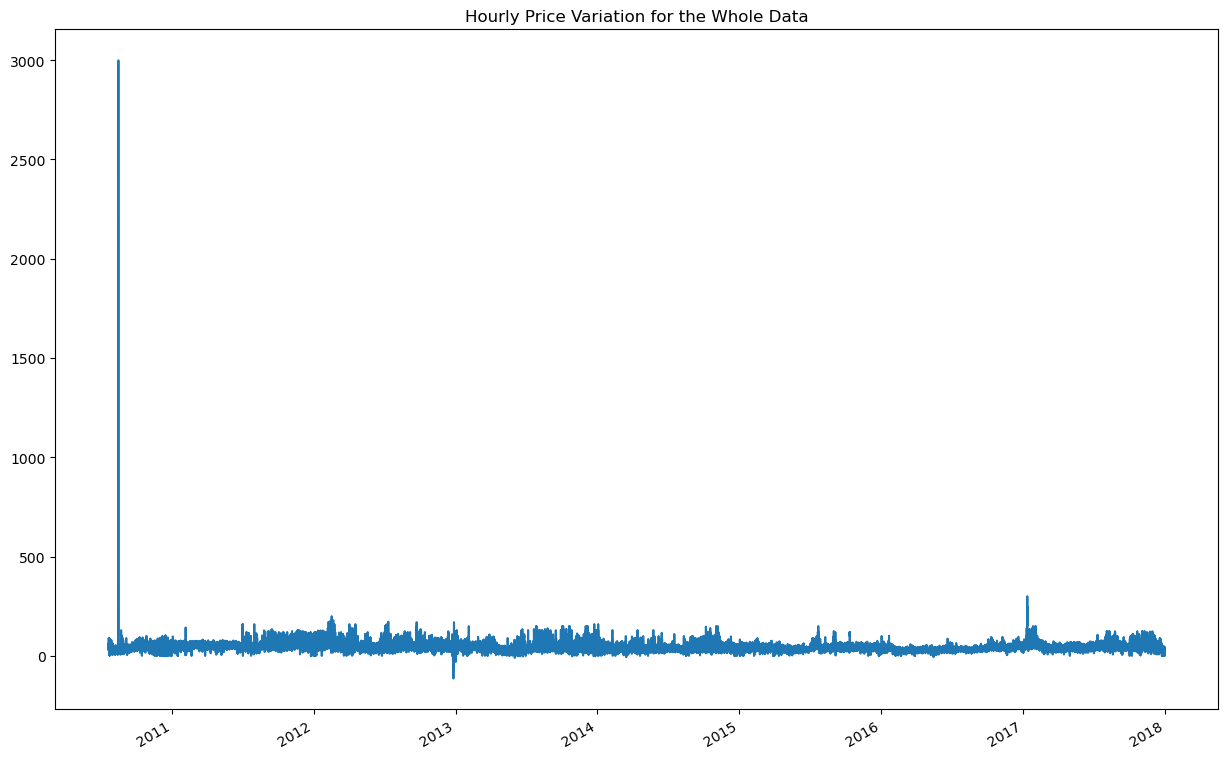

In [15]:
df['Prices'].plot(figsize=(15,10), title= 'Hourly Price Variation for the Whole Data');

There are some outliers both in the positive and negative direction. As there is renewable energy in the mix so it's not impossible for the price to be in negative but the outliers are better removed.

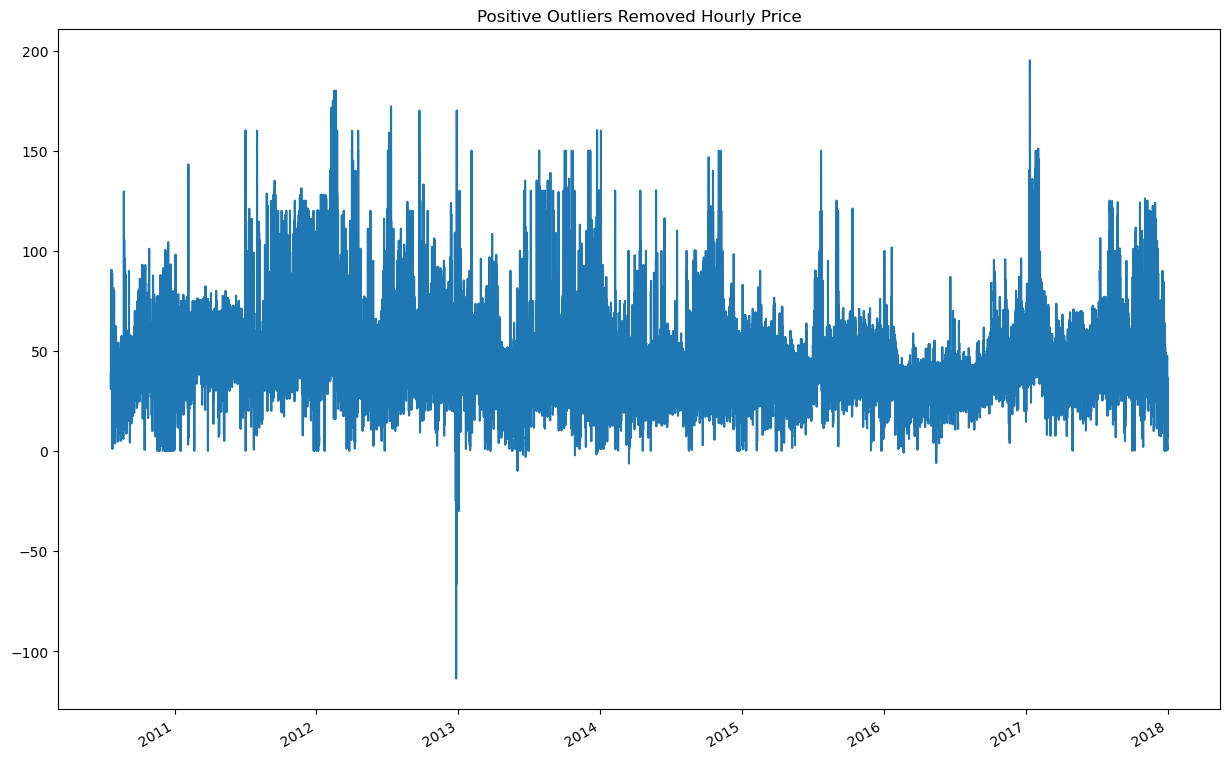

In [16]:
#removing positive outliers where prices are greater than 200
df=df[df['Prices']<200]
df['Prices'].plot(figsize=(15,10), title="Positive Outliers Removed Hourly Price");

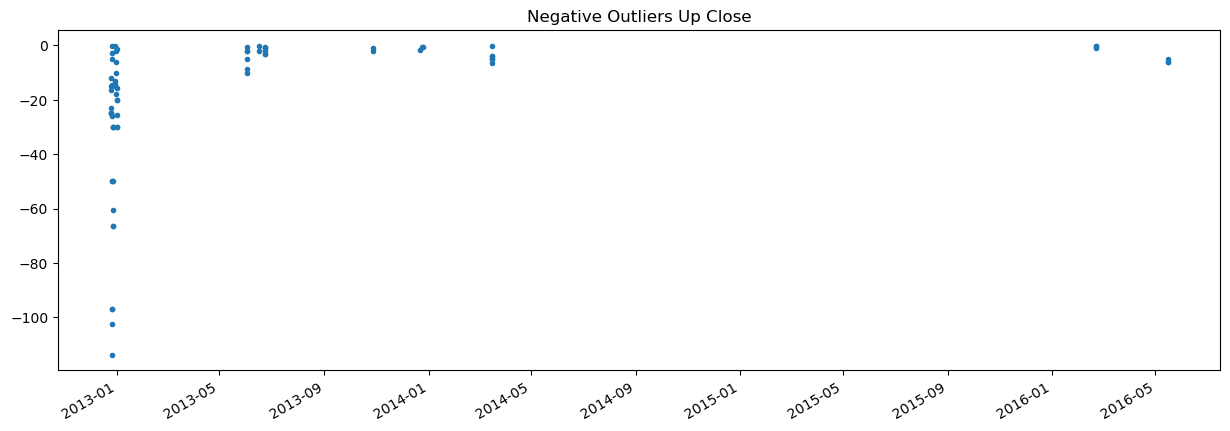

In [17]:
#to see the distribution in the negative part more closely.
neg_price=df[df['Prices']<0]
neg_price['Prices'].plot(figsize= (15,5),style='.', title= 'Negative Outliers Up Close');

<Axes: title={'center': 'Hourly Variation with the Outliers Removed'}>

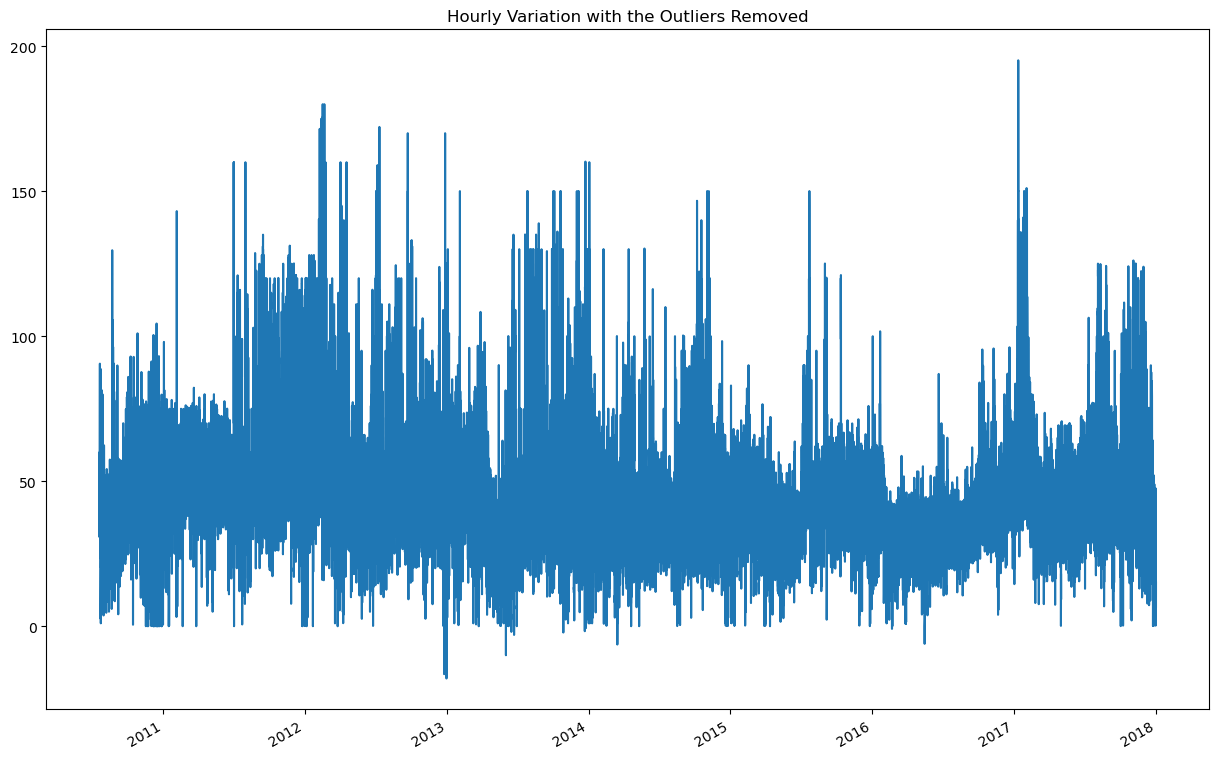

In [18]:
#removing negatrive outliers with prices less than -20
df=df[df['Prices']>-20]
df['Prices'].plot(figsize=(15,10), title='Hourly Variation with the Outliers Removed')

Now let's see the variation for a month taken randomly.

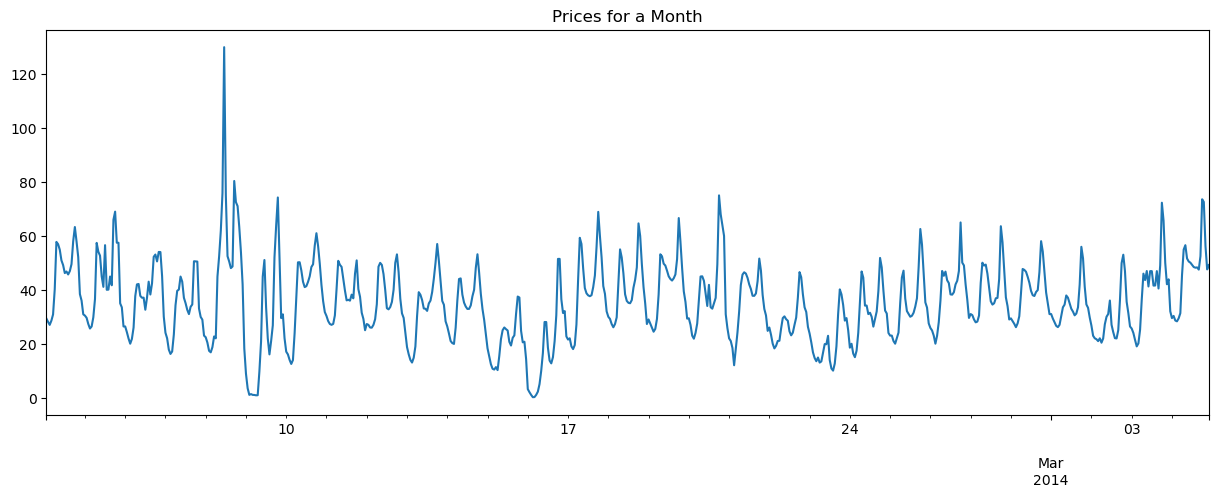

In [19]:
#Plotting Prices for a randomly taken month
df.loc[(df.index > pd.to_datetime('2014.02.04 00:00:00')) & (df.index < pd.to_datetime('2014.03.04 23:00:00'))]['Prices'].plot(figsize=(15, 5), title='Prices for a Month');

Some patterns may be observed on a daily as well as weekly basis. These time features have to be used for training the model.

##ML Modelling

Let's start creating our model. XGBoost library is used here.


In [20]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


ModuleNotFoundError: No module named 'xgboost'

###Splitting the data into Train and Test datasets.

Let's take data upto June 2015 for trainning and keep the rest for Testing.

Now, as seen earlier there lies some time series features in the data. Let's create features like 'hour', 'dayofweek', 'year' etc. based on pandas timeseries index for a robust model.

In [ ]:
#function for feature creation taking a dataframe.
def create_features(df):

    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df



In [ ]:
#passing our df through the fn for feature addition
df = create_features(df)

Also add some lag features

In [ ]:
def add_lags(df):
    target_map = df['Prices'].to_dict()
    #52 weeks lag
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    #52*2 weeks lag
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    #52*3 weeks lag
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [ ]:
#adding lag feature columns in df
df= add_lags(df)

In [ ]:
#final df
df.head()

###Training using Cross Validation

In [ ]:
#Splitting the model using TimeSeriesSplit
# Creating 5 splits and test data size of two years.
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    #storing train and test datasets
    df=df.copy()
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]


    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'Prices'

    #Putting all the FEATURES in the X_train and the TARGET in y_train for training the model.
    X_train = train[FEATURES]
    y_train = train[TARGET]

    #Putting all the FEATURES in the X_test and the TARGET in y_test for testing the model.
    X_test = test[FEATURES]
    y_test = test[TARGET]

    #creating the regressor model named reg
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=5,
                          learning_rate=0.01)

    #fitting the training data and simultaneously evaluting RMS Error in both train and test data
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)
    #predicted value
    y_pred = reg.predict(X_test)
    #putting the predicted values in the list
    preds.append(y_pred)

    #Keeping score of the error
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

In [ ]:
#Let's see the rmse scores
scores

In [ ]:
#predicting from X_test data and putting the predictions in a column in test dataframe
y_pred= preds[3]

In [ ]:
#putting the predictions in a column in test data
test['prediction']=y_pred

In [ ]:
#merging the test prediction with the actual df
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

#Plotting the prediction over the actual data
ax = df[['Prices']].plot(figsize=(15, 5), style='.')
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Actual Data', 'Predictions'])
ax.set_title('Prediction over Actual Data')
plt.show()

##Adjusted R2 Score

In [ ]:
from sklearn.metrics import r2_score
df17.dropna(inplace=True) #dropping the Null values

In [ ]:
#Taking Prediction and Actual Prices for the year 2017 to check R2 score
y_pred17= np.array (y_pred)
y_actual17= np.array(df17.Prices)

In [ ]:
#Calculating R2 score
r2= r2_score(y_actual17,y_pred17)

n= len(y_pred17)
p= 9    #Total number for Features used len(FEATURES)

#Calculating Adjusted R2 score
adj_r2= 1-((1-r2)*(n-1)/(n-p-1))

print('R-squared Score is: ',r2)
print('Adjusted R-squared Score is: ',adj_r2)

###Future Prediction

In [ ]:
# Retrain on all data
df = create_features(df)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'Prices'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=1000,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

In [ ]:
# Create future dataframe
future = pd.date_range(pd.to_datetime('2018-01-01 00:00:00'),pd.to_datetime('2018-12-31 23:00:00'), freq='1h')
future_df = pd.DataFrame(index=future)

#Setting dummy column to be used later for differentiating df and future_df data
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)


In [ ]:
#Copying the features only from future_df using the dummy mentioned above
future_w_features = df_and_future.query('isFuture').copy()

Future regression

In [ ]:
#Putting the future predictions in a column
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

In [ ]:
#plotting the future prediction
future_w_features['pred'].plot(figsize=(10, 5),
                               color='g',
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

In [ ]:
#grouping the future hourewise prediction and storing in a list
daily_hourewise=np.array(future_w_features['pred'].groupby(future_w_features.index.date).apply(list))

In [ ]:
#Averaging the hourewise values for a day to get Daily Average Price
daily_mean=[]
for i in daily_hourewise:
  daily_mean.append(np.mean(i))


### Final Daily Average Predicted Price

In [ ]:
#Storing the predictions in a DataFrame
Prediction_18= pd.DataFrame({'Date':pd.date_range('2018.01.01','2018.12.31'),'Average Price (EUR/MWh)':daily_mean})

In [ ]:
#Plotting the predictions for 2018
plt.plot(Prediction_18.Date,Prediction_18['Average Price (EUR/MWh)']);

In [ ]:
#Saving the Prediction as CSV file
Prediction_18.to_csv('Prediction_18.csv')